# Imports and Boilerplate

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from jump_detection.processor import TimeSeriesProcessor
from jump_detection.utils import normalize_features, get_eps, get_class_labels, calculate_median_jump, normalize_jump
from jump_detection.plotting import *

# Initialization


In [5]:
# Define a window size for the moving Fstat
window_size = 200
gap_size = 50


# Step 1: Identify all jumps

In [28]:
processor = TimeSeriesProcessor(window_size, gap_size)
processor.load_data("13_4_decay_exp_data.csv")
processor.data = processor.data[0:300000,1:]

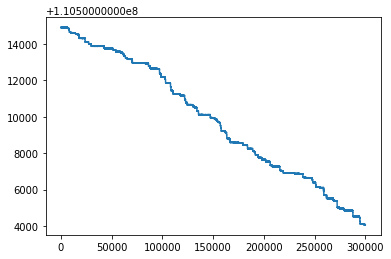

In [29]:
plt.plot(processor.data[:,1])
plt.show()

In [30]:
segments = processor.process_data()


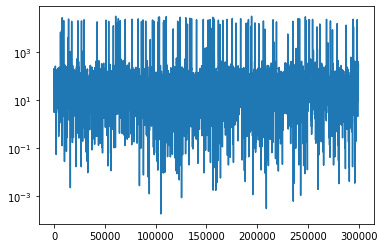

In [32]:
plt.plot(processor.moving_fstats)
plt.yscale('log')
# plt.ylim((0,10))

In [33]:
print(r"A total of %s jumps were found: "%len(processor.segments))


A total of 382 jumps were found: 


# Step 2: Reduce to single-event jumps

## Operating on individual segments

In [34]:
segment = processor.segments[10]

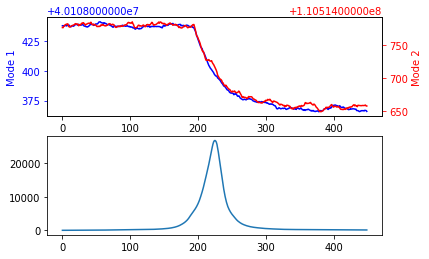

In [35]:
plot_segment(segment)

In [36]:
segment.features

(28,
 2340.5551459378903,
 29291291.00296097,
 3.068730912592453,
 8.892548240557527)

In [37]:
segment.calculate_freq_shift(window_size)
print(segment.diff)

[-1.68264385e-06 -1.07023089e-06]


## Getting all features

In [38]:
jump_features = processor.get_all_features()


## Plotting Feature Space and Eps Determination

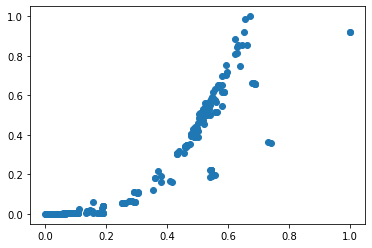

In [39]:
plt.scatter(jump_features[:,1],jump_features[:,2])

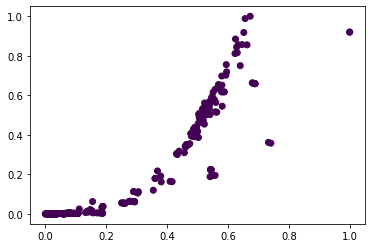

In [45]:
eps = get_eps(jump_features)
labels = get_class_labels(jump_features, eps)
plt.scatter(jump_features[:,1],jump_features[:,2], c = labels)

# Step 3

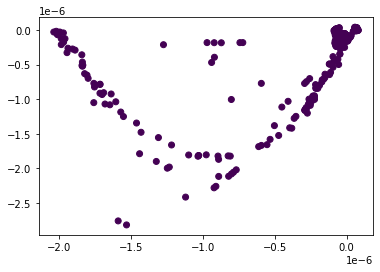

In [41]:
diffs = processor.get_all_diffs()
plt.scatter(diffs[:,0],diffs[:,1], c = labels)

In [42]:
median_jump = calculate_median_jump(processor.segments, labels)

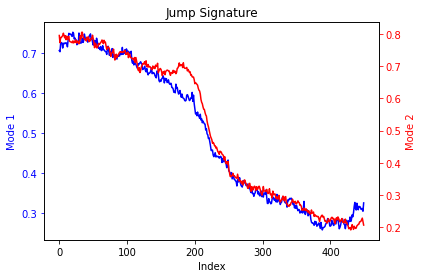

In [43]:
plot_jump_signature(processor.segments, labels)